# Double Lens Scan Plots

## Magnetic Lens, Monte Carlo Particle Trajectory Simulations

**Andrew Winnicki**<br/>
**Summer 2020**<br/>


<hr style='height:2px'>

---



In [12]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# set seaborn plotting style
sns.set_style("darkgrid")

# set date
date = datetime.date.today()

In [16]:
# initial nolensscan amount
scan_nolens = pd.read_csv('{}/no_lens_{}.csv'.format(date, date))
scan_nolens['mean'] = scan_nolens[ints].mean(axis=1) / 1000 # divide by number of particles

,l_cell_to_lens_aperture,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,mean
0,0.3,0,2,1,1,3,1,2,1,2,...,0,3,2,1,1,0,1,2,4,0.001455


In [26]:
# import csv files and convert to pandas dataframe
scan_lens = pd.read_csv('manual_test_sep15.csv')
# scan_nolens = pd.read_csv('{}/no_lens_{}.csv'.format(date, date))

# create list of strings for column names
ints = list(range(0, 11))
ints = list(map(str, ints))

# add mean
scan_lens['enhancement'] = scan_lens[ints].mean(axis=1)

# convert to enhancement
scan_lens['enhancement'] = scan_lens['enhancement'] / scan_nolens['mean'].values[0]

# drop unwanted columns
scan_lens = scan_lens.dropna(axis='columns')

# display dataframe for error checking
scan_lens

,lens_1_dist,lens_2_dist,0,1,2,3,4,5,6,7,8,9,10,enhancement
0,0.0,0.00,0.005,0.006,0.004,0.006,0.004,0.005,0.006,0.009,0.007,0.008,0.005,4.0625
1,0.0,0.05,0.008,0.012,0.003,0.005,0.008,0.010,0.005,0.010,0.009,0.011,0.009,5.6250
2,0.0,0.10,0.008,0.008,0.014,0.002,0.006,0.003,0.008,0.009,0.006,0.006,0.002,4.5000
3,0.0,0.15,0.005,0.007,0.013,0.013,0.010,0.007,0.008,0.010,0.008,0.007,0.007,5.9375
4,0.0,0.20,0.005,0.003,0.007,0.005,0.010,0.014,0.008,0.008,0.006,0.008,0.006,5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.5,0.30,0.007,0.008,0.007,0.005,0.008,0.005,0.004,0.009,0.006,0.006,0.007,4.5000
117,0.5,0.35,0.004,0.006,0.003,0.003,0.004,0.004,0.006,0.004,0.008,0.006,0.004,3.2500
118,0.5,0.40,0.002,0.003,0.002,0.004,0.005,0.004,0.004,0.007,0.003,0.004,0.008,2.8750
119,0.5,0.45,0.000,0.002,0.002,0.005,0.006,0.003,0.004,0.001,0.004,0.004,0.002,2.0625


In [33]:
# pivot by lens 1 dist and make columns lens 2 dist for heatmap, values are enhancements
heatmap_2d_scan = scan_lens.pivot(index='lens_1_dist', columns='lens_2_dist', values='enhancement')
heatmap_2d_scan

lens_2_dist,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50
lens_1_dist,,,,,,,,,,,
0.00,4.0625,5.6250,4.5000,5.9375,5.0000,5.7500,4.7500,4.2500,3.8750,3.0625,3.4375
0.05,5.1250,3.5625,6.5625,6.3125,6.4375,6.3125,5.6250,5.4375,3.8750,2.5625,3.0625
0.10,4.9375,6.3125,4.6250,7.8125,8.3125,8.7500,6.7500,5.2500,3.9375,4.3125,4.3750
0.15,6.7500,6.5000,6.4375,5.0625,7.5625,8.3750,6.4375,7.0625,5.1875,5.1875,4.0625
0.20,5.1875,7.1250,7.6250,8.8125,4.5000,8.0000,5.6875,5.3125,5.0000,3.1875,4.1250
0.25,6.0000,6.3750,9.0625,7.1250,9.1875,4.3750,8.2500,6.0625,5.5625,4.6875,4.8125
0.30,4.3125,5.3750,6.0625,7.4375,6.5625,8.6250,3.6875,5.2500,4.1250,3.1250,4.1250
0.35,4.8125,4.7500,5.5625,6.9375,6.6875,6.3750,5.8125,3.3750,4.1250,3.6875,3.0000
0.40,4.1875,4.9375,4.5000,5.1875,5.3750,4.8750,4.5625,4.2500,2.7500,3.1875,3.1875


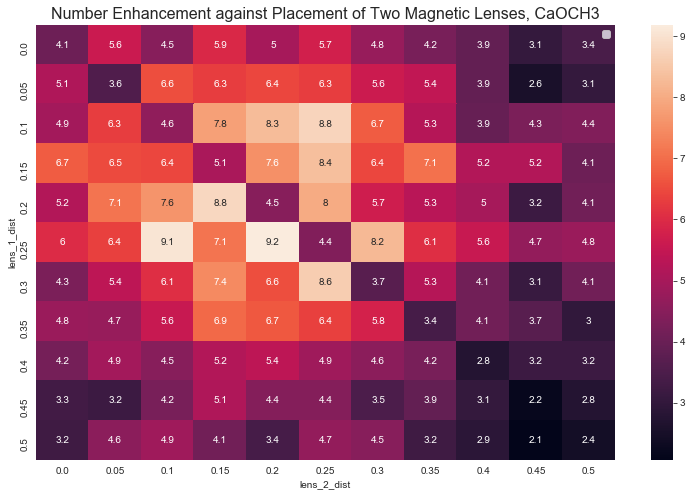

In [46]:
# create heatmap
fig, axis = plt.subplots(figsize=(1.62*8, 8))
sns.heatmap(heatmap_2d_scan, annot=True, ax=axis)
axis.set_title('Number Enhancement against Placement of Two Magnetic Lenses, CaOCH3', fontsize=16)
axis.legend('Number Enhancement')
plt.show()

In [ ]:
# # pull relevant data from dataframes
# z_decel = scan_lens['z_decel']
# mean_lens = scan_lens['mean']
# std_lens = scan_lens['std_dev']
# # mean_nolens = scan_nolens['mean'] / 100
# # std_nolens = scan_nolens['std_dev'] / 100

# # plot results
# plt.figure(figsize=(7*1.62, 7))
# sns.lineplot(z_decel, mean_lens, label='MSR, With Lens')
# plt.fill_between(z_decel, mean_lens + std_lens, mean_lens - std_lens, alpha=0.15)
# # plt.axhline(y=float(mean_nolens), ls=':', color='r', label='MSR, No Lens')

# # labels
# plt.title('Mean Success Rate (MSR) vs. Z-Axis Deceleration', fontsize=23)
# plt.xlabel('Deceleration (N)', fontsize=15)
# plt.ylabel('MSR', fontsize=15)
# plt.tick_params(axis='both', labelsize=13)
# plt.legend(fontsize=12)
# plt.show()